### Introduction

The point of this notebook is to check if using dynamic graphs, larger graphs or different topologies change anything in respect to how good the membership inference attacks are. 8 experiments were made varying three parameters: size of the network (16 or 64 nodes), topology (Erdős–Rényi or Small-World) and whether the graph changes at every communication round or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
def plot(df, x = 'iter', y = 'accuracy', logy = False, logx = False, 
         title = '', agg = 'name', sh_var = 'max_norm', legtitle = '',
         xlim = None, ylim = None, scatter = False, linewidth = 4):
    df = df.copy()
    df['iter'] = df['iter']
    plt.figure(figsize = (6, 6))
    for name in sorted(np.unique(df[agg])):
        curr = df[df[agg] == name]
        if scatter:
            plt.scatter(curr[x], curr[y], label = name, alpha = 0.5)
        else:
            plt.plot(curr[x], curr[y], label = name, alpha = 0.5, linewidth = linewidth)
    if logy:
        plt.yscale('log')
    if logx:
        plt.xscale('log')
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title = legtitle)
    plt.show()

In [3]:
def read(i, j, k):
    file = '../results/dynamic/{}-{}-{}.csv'.format(i, j, k)
    print(file)
    curr = pd.read_csv(file)
    curr.drop(columns = ['epsilon', 'best_alpha', 'max_norm', 'noise_multiplier'], inplace = True)
    curr['type'] = 'Dynamic' if i == 'd' else 'Non Dynamic'
    curr['topology'] = 'Erdos-Renyi' if j == 'rd' else 'Small World'
    curr['size'] = k + ' nodes'
    curr['name'] = '{}-{}-{}'.format(i, j, k)
    return curr

In [4]:
dnd, gr, sz = ['nd', 'd'], ['rd', 'sw'], ['16', '64']
df = pd.DataFrame()
for i, j, k in product(dnd, gr, sz):
    curr = read(i, j, k)
    df = pd.concat([df, curr])
df = df[df['iter'] <= 200]
df.describe()

../results/dynamic/nd-rd-16.csv
../results/dynamic/nd-rd-64.csv
../results/dynamic/nd-sw-16.csv
../results/dynamic/nd-sw-64.csv
../results/dynamic/d-rd-16.csv
../results/dynamic/d-rd-64.csv
../results/dynamic/d-sw-16.csv
../results/dynamic/d-sw-64.csv


iter         loss     accuracy  convergence_score  \
count  1600.000000  1600.000000  1600.000000        1600.000000   
mean    100.500000     0.492389     0.553251           0.831678   
std      57.752356     0.655563     0.108869           0.527667   
min       1.000000     0.007578     0.101148           0.033797   
25%      50.750000     0.021730     0.572942           0.537634   
50%     100.500000     0.088695     0.588401           0.723894   
75%     150.250000     0.851810     0.602075           0.995643   
max     200.000000     2.299053     0.634011           5.353979   

                time  auc_attack_before  auc_attack_after  
count    1600.000000        1600.000000       1600.000000  
mean    94875.876840           0.763557          0.748754  
std     96225.083490           0.141843          0.145127  
min       257.615983           0.512505          0.510711  
25%     22681.776147           0.617000          0.589184  
50%     45227.006323           0.854837          0.812598  
75%    163633.303198           0.873955          0.872338  
max    327326.561012           0.915633          0.933073

### Inspecting accuracy
The accuracy of all models are quite similar, although it looks like that larger graphs take more time to converge.

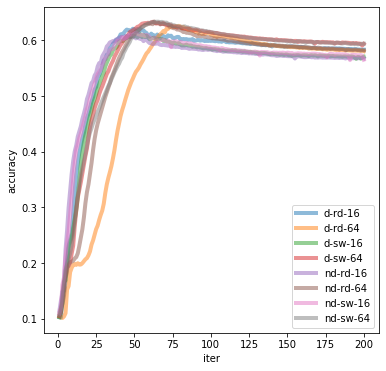

In [5]:
plot(df)

### Inspecting privacy with regards to size
Larger graphs are more robust to attacks in the beginning of the training, but after a large number of iterations they become even worse than small graphs.

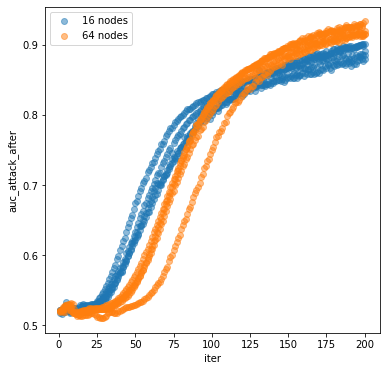

In [6]:
plot(df, y = 'auc_attack_after', agg = 'size', scatter = True)

### Inspecting privacy with regards to changing the graph
Dynamic graphs seem to be a little more resistant to MIAs. They seem to take longer to be vulnerable and overall are a little bit more private in the end.

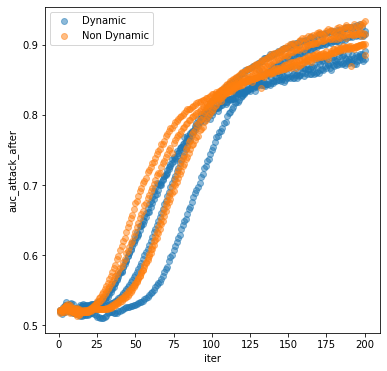

In [7]:
plot(df, y = 'auc_attack_after', agg = 'type', scatter = True)

### Inspecting privacy with regards to topology
It seems that being a Erdős–Rényi graph or a Small World does not make a lot of difference in the privacy of a Decentralized Learning System.

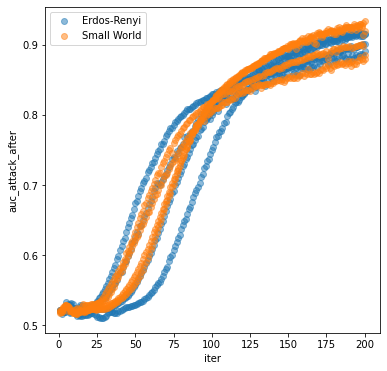

In [8]:
plot(df, y = 'auc_attack_after', agg = 'topology', scatter = True)

### Conclusion
It seems that using aggregation is not very effective overall in thwarting membership inference attacks. The best change to the DL framework is to make the graph dynamic, but this is still note ver useful.